# Bitcoin Price Prediction

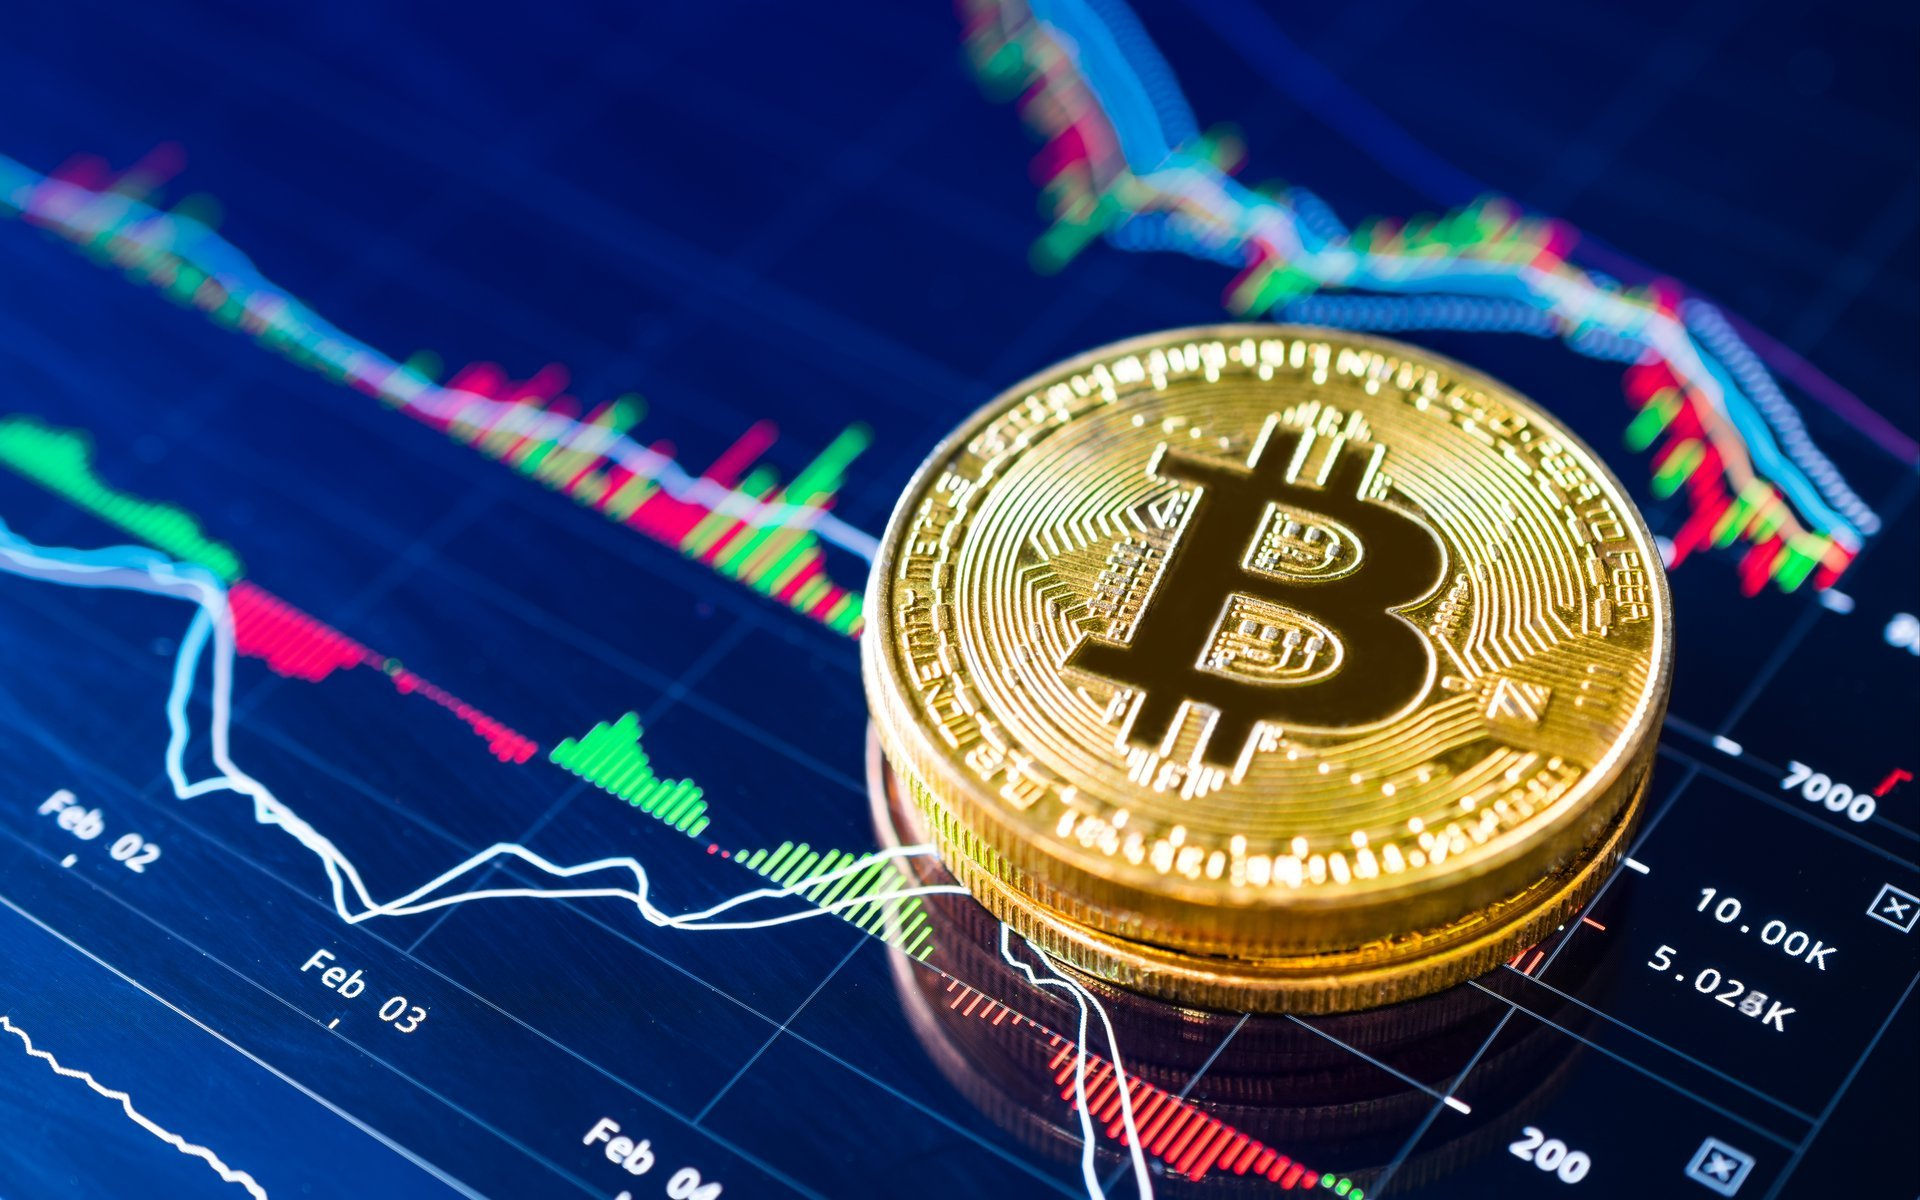

Bitcoin, the pioneering cryptocurrency, has transformed the landscape of finance and technology since its inception in 2009. Operating on a decentralized network called blockchain, Bitcoin enables peer-to-peer transactions without the need for intermediaries like banks or governments. Its underlying technology, blockchain, ensures transparency, security, and immutability of transactions. Bitcoin's supply is capped at 21 million coins, making it a deflationary asset. The issuance of new bitcoins is governed by a predetermined algorithm, halving approximately every four years, leading to diminishing supply growth over time.

Bitcoin's price exhibits significant volatility, influenced by factors such as market demand, investor sentiment, regulatory developments, macroeconomic conditions, and technological advancements. Its price history has been marked by dramatic surges and corrections, attracting both enthusiastic supporters and skeptics. Bitcoin's increasing adoption as a store of value, medium of exchange, and investment asset has propelled it into the mainstream financial ecosystem.

As a financial instrument, Bitcoin has garnered attention from institutional investors, hedge funds, corporations, and retail traders seeking diversification and potential high returns. It has also sparked innovation in the form of cryptocurrency exchanges, wallets, payment solutions, and decentralized finance (DeFi) applications. Bitcoin's role in shaping the future of finance and challenging traditional monetary systems continues to evolve amidst ongoing debates about its legitimacy, regulation, scalability, and environmental impact.

Despite its disruptive potential, Bitcoin faces challenges such as scalability issues, energy consumption concerns related to mining, regulatory uncertainty, security vulnerabilities, and competition from alternative cryptocurrencies. Nevertheless, Bitcoin remains a symbol of technological innovation, financial sovereignty, and the pursuit of a decentralized future, captivating the imagination of individuals and institutions worldwide.

# Libraries

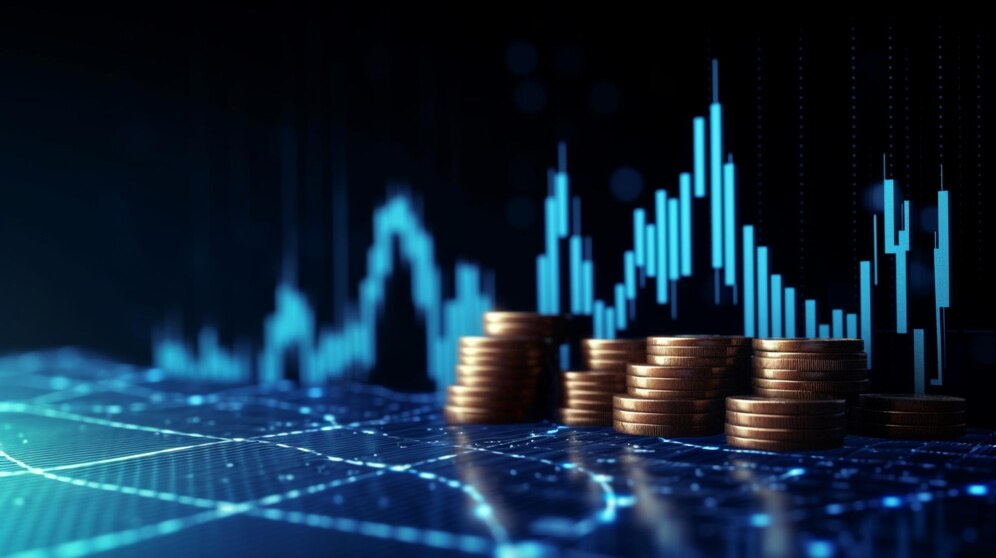

Pandas: Pandas is a powerful data manipulation and analysis library. It provides data structures like Series and DataFrame, which are particularly useful for handling time series data.

NumPy: NumPy is a fundamental package for scientific computing with Python. It provides support for mathematical functions to operate on arrays and matrices.

Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is often used for plotting time series data.

Statsmodels: Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and exploring data.

Scipy: Scipy is a scientific computing library that builds on NumPy. It provides many useful functions for optimization, interpolation, integration, linear algebra, and more.

Warnings: The warnings module is used to handle warning messages that might occur during the execution of a Python script.

Itertools: The itertools module provides functions creating iterators for efficient looping, including combinations, permutations, and other operations on iterables.

Datetime: The datetime module supplies classes for manipulating dates and times.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy import stats
import warnings
from itertools import product
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from joblib import Parallel, delayed
import itertools

# Data Loading

In [36]:
# Load the bitcoin data.
Bitcoin_df = pd.read_csv('BTC-USD.csv',usecols=['Date','Close'])
# it is used for to print first five rows.
Bitcoin_df.head()

,Date,Close
0,2014-10-01,383.614990
1,2014-10-02,375.071991
2,2014-10-03,359.511993
3,2014-10-04,328.865997
4,2014-10-05,320.510010


In [37]:
# it is used to print last five rows.
Bitcoin_df.tail()

,Date,Close
3526,2024-05-27,69394.554688
3527,2024-05-28,68296.218750
3528,2024-05-29,67578.093750
3529,2024-05-30,68364.992188
3530,2024-05-31,67491.414063


In [38]:
# it is used to get info about the data.
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3531 non-null   object 
 1   Close   3531 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.3+ KB


# Converting the into datetime format

In [39]:
# Convert the 'Date' column to datetime format
Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df['Date'])

In [40]:
# Set the 'Date' column as the index
Bitcoin_df.set_index('Date', inplace=True)

# Resample the data

In [41]:
# Resampling to monthly frequency
df_month = Bitcoin_df.resample('M').mean()

# Resampling to annual frequency
df_year = Bitcoin_df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = Bitcoin_df.resample('Q-DEC').mean()

# Plot the resampled data

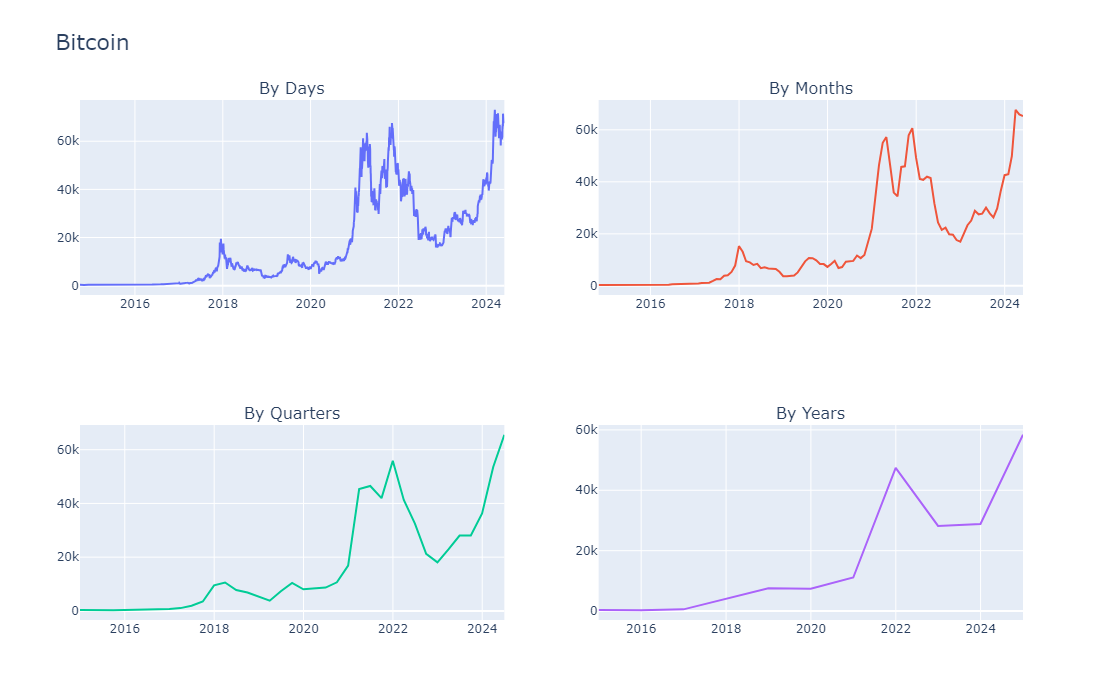

In [42]:
# using the plotly we can plot the data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# used to make subplots.
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("By Days", "By Months", "By Quarters", "By Years")
)

# Adding traces for each subplot
fig.add_trace(go.Scatter(x=Bitcoin_df.index, y=Bitcoin_df['Close'], mode='lines', name='By Days'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_month.index, y=df_month['Close'], mode='lines', name='By Months'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_Q.index, y=df_Q['Close'], mode='lines', name='By Quarters'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year.index, y=df_year['Close'], mode='lines', name='By Years'), row=2, col=2)

# Updating layout for better appearance
fig.update_layout(
    title_text="Bitcoin",
    title_font_size=22,
    height=700,
    width=1100,
    showlegend=False
)

fig.show()

# Decomposition of the data 

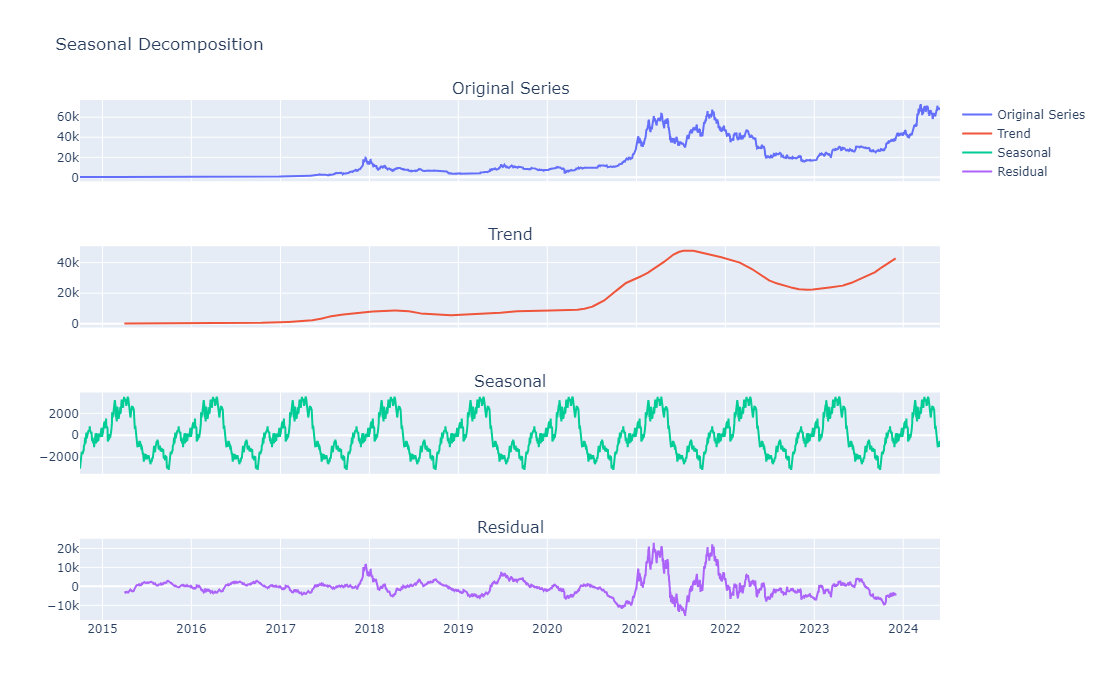

Dickey–Fuller test: p=0.849179


In [43]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(Bitcoin_df['Close'], model='additive', period=365)

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
                    subplot_titles=('Original Series', 'Trend', 'Seasonal', 'Residual'))

# Original Series
fig.add_trace(go.Scatter(x=Bitcoin_df.index, y=Bitcoin_df['Close'], mode='lines', name='Original Series'), row=1, col=1)

# Trend
fig.add_trace(go.Scatter(x=Bitcoin_df.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)

# Seasonal
fig.add_trace(go.Scatter(x=Bitcoin_df.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)

# Residual
fig.add_trace(go.Scatter(x=Bitcoin_df.index, y=decomposition.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout
fig.update_layout(height=700, width=1100, title_text="Seasonal Decomposition")
fig.show()

# Perform and print Dickey-Fuller test
adf_result = sm.tsa.stattools.adfuller(Bitcoin_df['Close'].dropna())
print("Dickey–Fuller test: p=%f" % adf_result[1])

the Dickey-Fuller test resulted in a p-value of approximately 0.849179. Since this p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that the time series is stationary.

# Dickey-Fuller test

In [44]:
# Perform Dickey-Fuller test on the original series
result = adfuller(Bitcoin_df)
print('ADF Statistic (original series):', result[0])
print('p-value (original series):', result[1])



ADF Statistic (original series): -0.6905603828356673
p-value (original series): 0.8491794835772297


The ADF statistic is -0.6905603828356673. This value is used to compare against critical values from the ADF table. Generally, the more negative the statistic, the stronger the evidence against the null hypothesis (indicating stationarity).
The p-value is approximately 0.849179. In hypothesis testing, the p-value helps you decide whether to reject the null hypothesis. A common threshold for rejecting the null hypothesis is 0.05.Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means there is not enough evidence to conclude that the series is stationary.

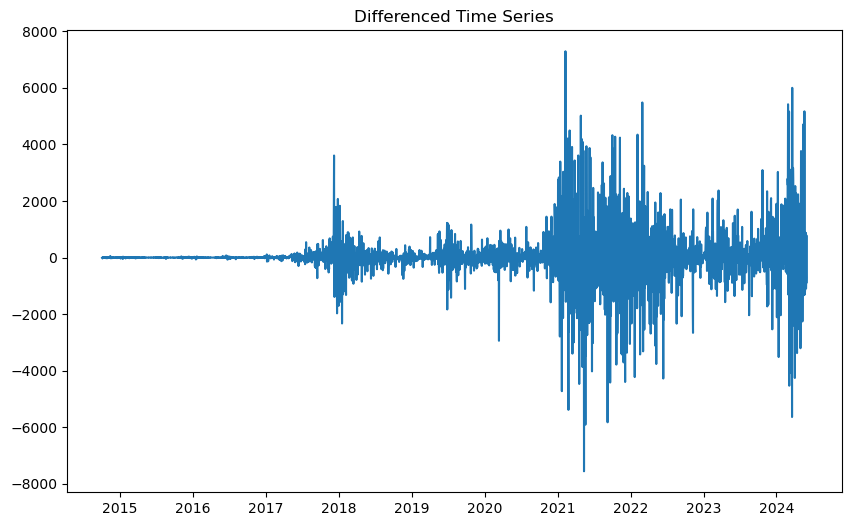

In [45]:
# First-order differencing
differenced_series = Bitcoin_df.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced_series)
plt.title('Differenced Time Series')
plt.show()



First-order Differencing
Differencing is a common technique used to make a time series stationary. 
It removes the trend component by subtracting the previous observation 
from the current observation.

plot illustrates the differenced values of a time series dataset over the period from 2015 to 2024. Initially, from 2015 to around 2017, the series shows stability with minimal fluctuations. However, starting around 2018, there is a noticeable increase in volatility, with significant peaks and troughs, which persists through to 2024. This suggests that the original time series experienced a change in variance or a structural break around 2018. While differencing is applied to achieve stationarity, the plot indicates that the series still exhibits heteroskedasticity (changing variance). This implies that additional modeling techniques, such as GARCH, might be necessary to address the non-constant variance for accurate forecasting.

ADF Statistic (differenced series): -9.266557919162906
p-value (differenced series): 1.3620162039775673e-15


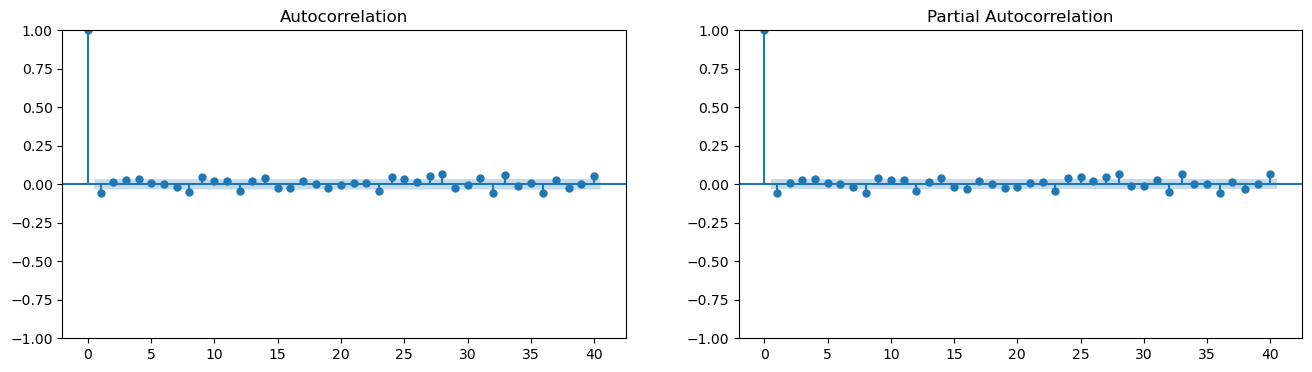

In [46]:
# Perform Dickey-Fuller test on the differenced series
result_diff = adfuller(differenced_series)
print('ADF Statistic (differenced series):', result_diff[0])
print('p-value (differenced series):', result_diff[1])


if result_diff[1] > 0.05:
    differenced_series = differenced_series.diff().dropna()
   
# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sm.graphics.tsa.plot_acf(differenced_series, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=40, ax=axes[1])
plt.show()


After applying first-order differencing to the Bitcoin closing prices series, the Augmented Dickey-Fuller (ADF) test was performed to check for stationarity. The results showed a significantly negative ADF Statistic of -9.2666 and a p-value of approximately 1.36e-15, indicating that the differenced series is stationary with a high level of confidence. This means the null hypothesis of non-stationarity can be rejected, confirming that the differencing effectively removed the trend. With the series now stationary, the next step involves determining the appropriate values for the AR (p) and MA (q) terms by analyzing the plots of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF). These plots help identify the order of the autoregressive and moving average components, guiding the selection of parameters for fitting an ARIMA or SARIMAX model to the time series data.

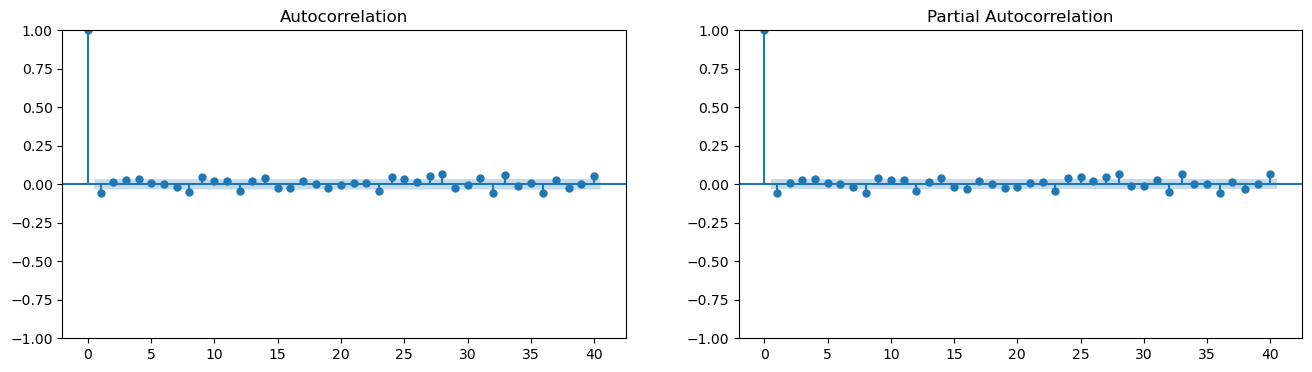

In [47]:
# Plot ACF and PACF of the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sm.graphics.tsa.plot_acf(differenced_series, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=40, ax=axes[1])
plt.show()

# Apply SARIMAX

In [ ]:
import statsmodels.api as sm

Fit SARIMA model with known parameters
model = sm.tsa.SARIMAX(Bitcoin_df['Close'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12)).fit(disp=False)

# Output the model summary
print(model.summary())


The SARIMAX model results for predicting the closing values of a time series over 3531 observations (from October 1, 2014, to May 31, 2024) are summarized. The model used is SARIMAX(1, 1, 1)x(1, 1, 1, 12), indicating a seasonal ARIMA with both seasonal and non-seasonal components. Key statistics include a Log Likelihood of -28792.917 and AIC of 57595.834, suggesting the model fit. The coefficients for AR(1) and MA(1) are -1.0000 and 1.0000, respectively, with high standard errors, indicating non-significant effects. The seasonal AR term at lag 12 (ar.S.L12) is 0.0174 (p=0.053), and the seasonal MA term (ma.S.L12) is -0.9954 (highly significant with p=0.000). The sigma squared (error variance) is 8.11e+05. Diagnostic tests reveal issues such as high heteroskedasticity (H=37.06, p=0.00), significant non-normality (Jarque-Bera = 29322.32, p=0.00), and autocorrelation (Ljung-Box Q=10.90, p=0.00), suggesting potential areas for model improvement.

# Plot the residual 

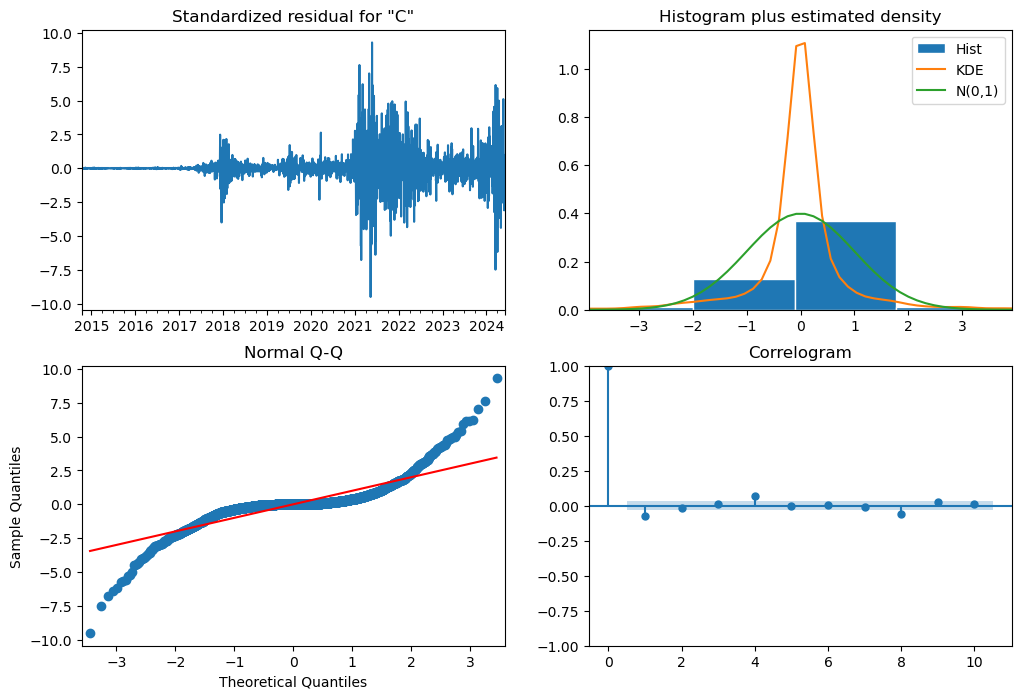

In [49]:
# Plot residuals and ACF of residuals
model.plot_diagnostics(figsize=(12, 8))
plt.show()

The histogram shows the distribution of the standardized residuals. In this case, it appears that the residuals are approximately normally distributed, with a slight skew to the right.The normal QQ plot compares the standardized residuals to a normal distribution. If the residuals are normally distributed, the points on the QQ plot will fall close to a straight line. In this case, the points on the QQ plot appear to fall approximately along a straight line, which suggests that the residuals are approximately normally distributed.The correlogram shows the correlations between the standardized residuals at different lags. In this case, the correlogram does not show any significant correlations between the residuals at different lags, which suggests that the residuals are independent and identically distributed (iid).
Overall, the results of the standardized residual analysis suggest that the model is a good fit for the data. 

# Forecast the next 100 days

In [50]:
# Specify the number of periods you want to forecast
forecast_periods = 100

# Make predictions for the specified number of periods
forecast = model.forecast(steps=forecast_periods)

# Output the forecasted values
print("Forecasted values:")
print(forecast)


Forecasted values:
2024-06-01    72661.242188
2024-06-02    71349.578125
2024-06-03    70335.382813
2024-06-04    69142.609375
2024-06-05    69739.148438
                  ...     
2024-09-04    77195.789063
2024-09-05    82365.617188
2024-09-06    81053.953125
2024-09-07    80039.757813
2024-09-08    78846.984375
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


# Plot the next 100 days data

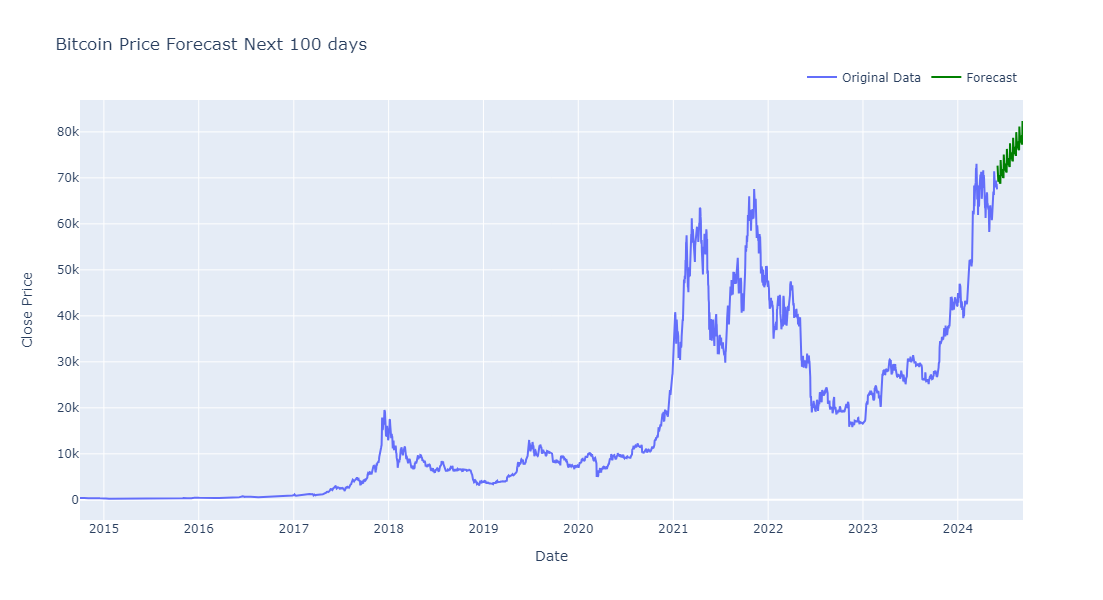

In [53]:
# Define the future index based on the existing index
last_date = Bitcoin_df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_periods + 1, inclusive='right')[1:]
future_index = future_dates

# Create a trace for the original data
trace_original = go.Scatter(x=Bitcoin_df.index, y=Bitcoin_df['Close'], mode='lines', name='Original Data')

# Create a trace for the forecasted values
trace_forecast = go.Scatter(x=future_index, y=forecast, mode='lines', name='Forecast', line=dict(color='green'))

# Combine all traces into a data list
data = [trace_original, trace_forecast]

# Create the layout
layout = go.Layout(
    title='Bitcoin Price Forecast Next 100 days',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Adjust the layout for better visualization
fig.update_layout(
    height=600,
    width=1000,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig.show()
